In [1]:
# Import packages/data

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.metrics import mean_squared_error

df = pd.read_csv('cleaned_data_250_prods.csv')
df['date'] = pd.to_datetime(df['date'])

df

,item_id,dept_id,cat_id,units_sold,date,day,month,year,wm_yr_wk,weekday,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,sell_price
0,HOBBIES_1_001,HOBBIES_1,HOBBIES,0,2013-07-13,13,7,2013,11325,Saturday,None,None,None,None,0,9.58
1,HOBBIES_1_001,HOBBIES_1,HOBBIES,0,2013-07-14,14,7,2013,11325,Sunday,None,None,None,None,0,9.58
2,HOBBIES_1_001,HOBBIES_1,HOBBIES,0,2013-07-15,15,7,2013,11325,Monday,None,None,None,None,0,9.58
3,HOBBIES_1_001,HOBBIES_1,HOBBIES,0,2013-07-16,16,7,2013,11325,Tuesday,None,None,None,None,0,9.58
4,HOBBIES_1_001,HOBBIES_1,HOBBIES,0,2013-07-17,17,7,2013,11325,Wednesday,None,None,None,None,0,9.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393314,HOBBIES_1_257,HOBBIES_1,HOBBIES,0,2016-05-18,18,5,2016,11616,Wednesday,None,None,None,None,0,16.76
393315,HOBBIES_1_257,HOBBIES_1,HOBBIES,0,2016-05-19,19,5,2016,11616,Thursday,None,None,None,None,0,16.76
393316,HOBBIES_1_257,HOBBIES_1,HOBBIES,0,2016-05-20,20,5,2016,11616,Friday,None,None,None,None,0,16.76
393317,HOBBIES_1_257,HOBBIES_1,HOBBIES,0,2016-05-21,21,5,2016,11617,Saturday,None,None,None,None,0,16.76


In [2]:
# Relabel data

df2 = df.copy()
cols = ['item_id','weekday','event_name_1','event_type_1','event_name_2','event_type_2','dept_id','cat_id','year','wm_yr_wk']

for col in cols:

    unique = df2[col].unique()

    int_to_unique = {i:unique for i,unique in enumerate(unique)}
    unique_to_int = {unique:i for i,unique in enumerate(unique)}

    df2[col] = df2[col].apply( lambda x: unique_to_int[x] )

df2

,item_id,dept_id,cat_id,units_sold,date,day,month,year,wm_yr_wk,weekday,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,sell_price
0,0,0,0,0,2013-07-13,13,7,0,0,0,0,0,0,0,0,9.58
1,0,0,0,0,2013-07-14,14,7,0,0,1,0,0,0,0,0,9.58
2,0,0,0,0,2013-07-15,15,7,0,0,2,0,0,0,0,0,9.58
3,0,0,0,0,2013-07-16,16,7,0,0,3,0,0,0,0,0,9.58
4,0,0,0,0,2013-07-17,17,7,0,0,4,0,0,0,0,0,9.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393314,249,0,0,0,2016-05-18,18,5,3,148,4,0,0,0,0,0,16.76
393315,249,0,0,0,2016-05-19,19,5,3,148,5,0,0,0,0,0,16.76
393316,249,0,0,0,2016-05-20,20,5,3,148,6,0,0,0,0,0,16.76
393317,249,0,0,0,2016-05-21,21,5,3,149,0,0,0,0,0,0,16.76


<AxesSubplot:>

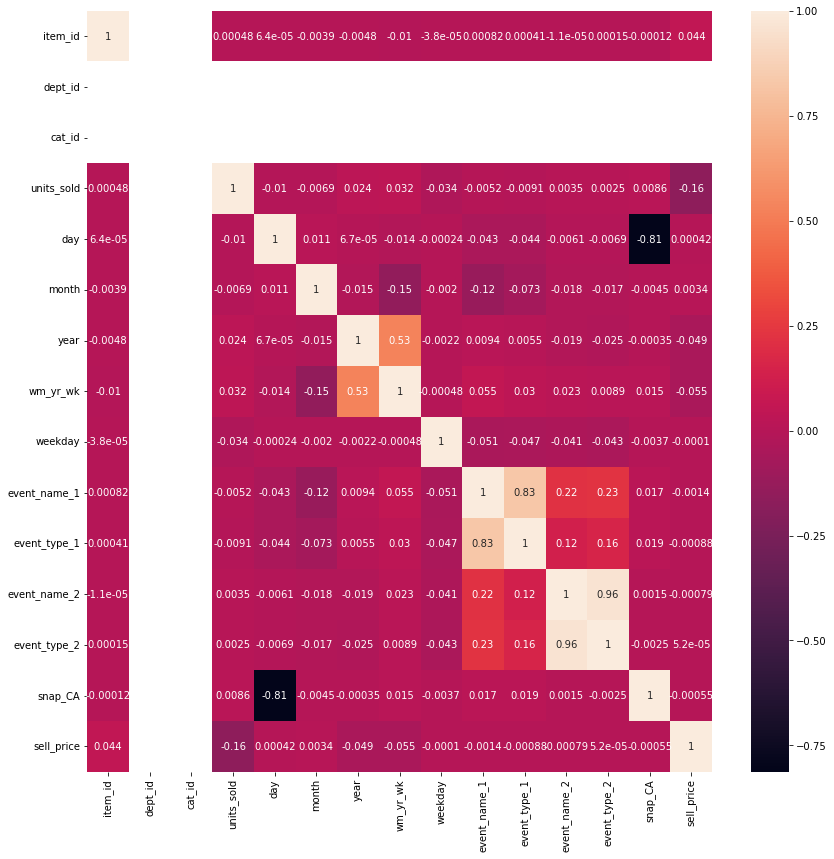

In [3]:
# Plot heatmap

fig, ax = plt.subplots(figsize=(14,14))
sns.heatmap(df2.corr(),annot=True)

<AxesSubplot:>

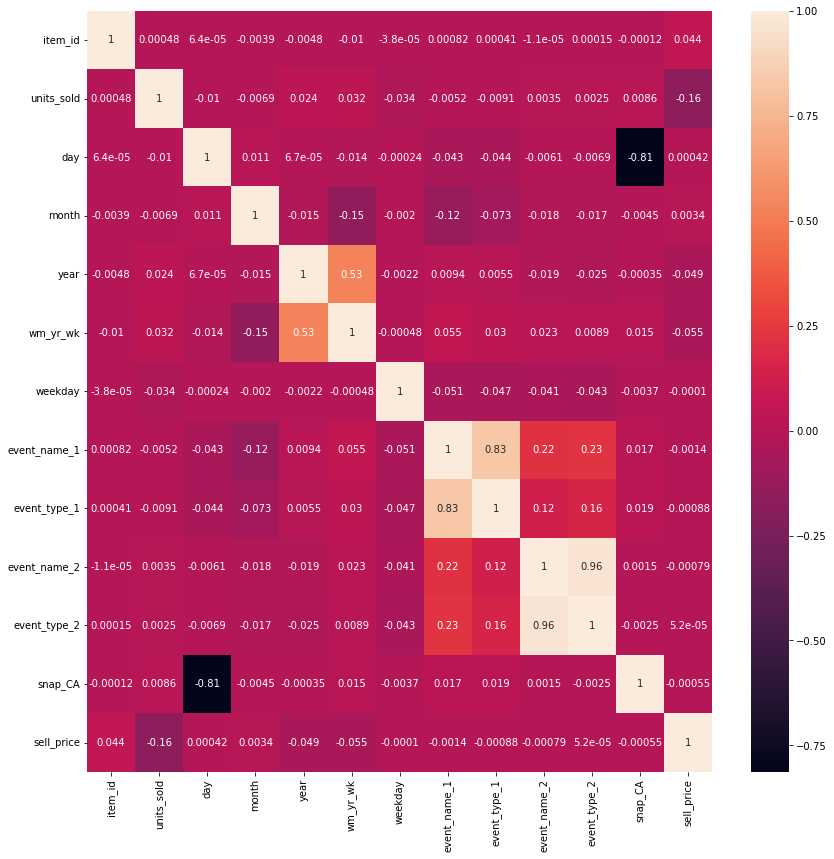

In [4]:
df3 = df2.drop(columns=['dept_id','cat_id'])

# Plot heatmap

fig, ax = plt.subplots(figsize=(14,14))
sns.heatmap(df3.corr(),annot=True)

In [ ]:
################################################################################################################################

In [5]:
small_df = df2[['item_id','date','sell_price','units_sold']]
small_df

,item_id,date,sell_price,units_sold
0,0,2013-07-13,9.58,0
1,0,2013-07-14,9.58,0
2,0,2013-07-15,9.58,0
3,0,2013-07-16,9.58,0
4,0,2013-07-17,9.58,0
...,...,...,...,...
393314,249,2016-05-18,16.76,0
393315,249,2016-05-19,16.76,0
393316,249,2016-05-20,16.76,0
393317,249,2016-05-21,16.76,0


In [ ]:
# ids = np.sort( small_df.item_id.unique() )

# df_dummy = small_df[small_df['item_id']==0]

# window = 7

# df_dummy['daily_rolling_mean_'+str(window)] = df_dummy['units_sold'].rolling(window,closed='left').mean()
# df_dummy = df_dummy.where(pd.notnull(df_dummy), 0)

# new_df = df_dummy.copy()

# new_df

In [ ]:
# length = len(ids)
# window = 7

# for i in range(1,length):
    
#     df_dummy = small_df[small_df['item_id']==ids[i]]

#     df_dummy['daily_rolling_mean_'+str(window)] = df_dummy['units_sold'].rolling(window,closed='left').mean()
#     df_dummy = df_dummy.where(pd.notnull(df_dummy), 0)

#     new_df = pd.concat([new_df,df_dummy])

# new_df

In [ ]:
# # Plot heatmap

# fig, ax = plt.subplots(figsize=(14,14))
# sns.heatmap(new_df.corr(),annot=True)

In [ ]:
# new_df['date'] = new_df['date'].astype(str)
# new_df['near_xmas'] = 0
# new_df['near_xmas'] = new_df['date'].apply( lambda x: 1 if (x>='2011-12-01' and x<='2011-12-26')
#                                                            or (x>='2012-12-01' and x<='2012-12-26')
#                                                            or (x>='2013-12-01' and x<='2013-12-26')
#                                                            or (x>='2014-12-01' and x<='2014-12-26')
#                                                            or (x>='2015-12-01' and x<='2015-12-26')
#                                                            or (x>='2016-12-01' and x<='2016-12-26')
#                                                            else 0 )

# new_df

In [ ]:
# # Plot heatmap

# fig, ax = plt.subplots(figsize=(14,14))
# sns.heatmap(new_df.corr(),annot=True)

In [ ]:
################################################################################################################################

In [6]:
new_df = small_df.copy()

train = new_df[new_df['date']<'2015-03-01']
train = train.drop(columns='date')
X_train = train.drop(columns='units_sold')
y_train = train['units_sold']

valid = new_df[ (new_df['date']>='2015-03-01') & (new_df['date']<'2015-11-17') ]
valid = valid.drop(columns='date')
X_valid = valid.drop(columns='units_sold')
y_valid = valid['units_sold']

test = new_df[new_df['date']>='2015-11-17']
test = test.drop(columns='date')
X_test = test.drop(columns='units_sold')
y_test = test['units_sold']

train.shape[0] / new_df.shape[0], valid.shape[0] / new_df.shape[0], test.shape[0] / new_df.shape[0]

(0.7146082441987293, 0.16589587586666293, 0.1194958799346078)

In [7]:
# Define categorical features

cat_columns = ['item_id']
print("Names of categorical columns : ", cat_columns)

cat_idx = [X_train.columns.get_loc(col) for col in cat_columns]
print("Indices of categorical columns : ",cat_idx)

Names of categorical columns :  ['item_id']
Indices of categorical columns :  [0]


In [8]:
# Import the Pool class from catboost and use it for train/test split

from catboost import Pool


train_data = Pool(data=X_train,
                  label=y_train,
                  cat_features=cat_idx
                 )

valid_data = Pool(data=X_valid,
                  label=y_valid,
                  cat_features=cat_idx
                 )

C:\Users\16479\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [9]:
# Create catboost model and train it

from catboost import CatBoostRegressor
from sklearn.model_selection import GridSearchCV

model = CatBoostRegressor(random_seed=2022, iterations=200, learning_rate=0.1)
model.fit(train_data, eval_set=valid_data)

0:	learn: 3.0817888	test: 2.7968772	best: 2.7968772 (0)	total: 479ms	remaining: 1m 35s
1:	learn: 3.0298658	test: 2.7418187	best: 2.7418187 (1)	total: 661ms	remaining: 1m 5s
2:	learn: 2.9870023	test: 2.7043422	best: 2.7043422 (2)	total: 849ms	remaining: 55.7s
3:	learn: 2.9524014	test: 2.6663088	best: 2.6663088 (3)	total: 976ms	remaining: 47.8s
4:	learn: 2.9241720	test: 2.6394368	best: 2.6394368 (4)	total: 1.1s	remaining: 42.8s
5:	learn: 2.9002715	test: 2.6168966	best: 2.6168966 (5)	total: 1.2s	remaining: 39s
6:	learn: 2.8804366	test: 2.5965115	best: 2.5965115 (6)	total: 1.33s	remaining: 36.7s
7:	learn: 2.8647920	test: 2.5849912	best: 2.5849912 (7)	total: 1.45s	remaining: 34.8s
8:	learn: 2.8337240	test: 2.5528409	best: 2.5528409 (8)	total: 1.57s	remaining: 33.3s
9:	learn: 2.8070230	test: 2.5278348	best: 2.5278348 (9)	total: 1.69s	remaining: 32s
10:	learn: 2.7846845	test: 2.5081891	best: 2.5081891 (10)	total: 1.78s	remaining: 30.5s
11:	learn: 2.7660830	test: 2.4926844	best: 2.4926844 (11)

94:	learn: 2.6487977	test: 2.3851926	best: 2.3851926 (94)	total: 9.98s	remaining: 11s
95:	learn: 2.6486759	test: 2.3849352	best: 2.3849352 (95)	total: 10.1s	remaining: 11s
96:	learn: 2.6486227	test: 2.3837714	best: 2.3837714 (96)	total: 10.2s	remaining: 10.8s
97:	learn: 2.6484525	test: 2.3836488	best: 2.3836488 (97)	total: 10.3s	remaining: 10.7s
98:	learn: 2.6483975	test: 2.3835802	best: 2.3835802 (98)	total: 10.5s	remaining: 10.7s
99:	learn: 2.6481917	test: 2.3837415	best: 2.3835802 (98)	total: 10.8s	remaining: 10.8s
100:	learn: 2.6481277	test: 2.3837813	best: 2.3835802 (98)	total: 11s	remaining: 10.8s
101:	learn: 2.6479126	test: 2.3840970	best: 2.3835802 (98)	total: 11.2s	remaining: 10.8s
102:	learn: 2.6477059	test: 2.3840636	best: 2.3835802 (98)	total: 11.4s	remaining: 10.7s
103:	learn: 2.6477004	test: 2.3840564	best: 2.3835802 (98)	total: 11.5s	remaining: 10.6s
104:	learn: 2.6476845	test: 2.3831587	best: 2.3831587 (104)	total: 11.7s	remaining: 10.6s
105:	learn: 2.6476203	test: 2.38

186:	learn: 2.6398239	test: 2.3782229	best: 2.3781818 (184)	total: 24.9s	remaining: 1.73s
187:	learn: 2.6397920	test: 2.3782345	best: 2.3781818 (184)	total: 25.1s	remaining: 1.6s
188:	learn: 2.6397075	test: 2.3782274	best: 2.3781818 (184)	total: 25.2s	remaining: 1.46s
189:	learn: 2.6396687	test: 2.3781591	best: 2.3781591 (189)	total: 25.2s	remaining: 1.33s
190:	learn: 2.6395549	test: 2.3783614	best: 2.3781591 (189)	total: 25.3s	remaining: 1.19s
191:	learn: 2.6395131	test: 2.3780985	best: 2.3780985 (191)	total: 25.4s	remaining: 1.06s
192:	learn: 2.6394600	test: 2.3780233	best: 2.3780233 (192)	total: 25.6s	remaining: 928ms
193:	learn: 2.6394233	test: 2.3779938	best: 2.3779938 (193)	total: 25.7s	remaining: 795ms
194:	learn: 2.6392784	test: 2.3779198	best: 2.3779198 (194)	total: 25.8s	remaining: 661ms
195:	learn: 2.6391716	test: 2.3805075	best: 2.3779198 (194)	total: 25.9s	remaining: 528ms
196:	learn: 2.6390963	test: 2.3806275	best: 2.3779198 (194)	total: 26s	remaining: 396ms
197:	learn: 2

Text(0.5, 1.0, 'Feature Importance')

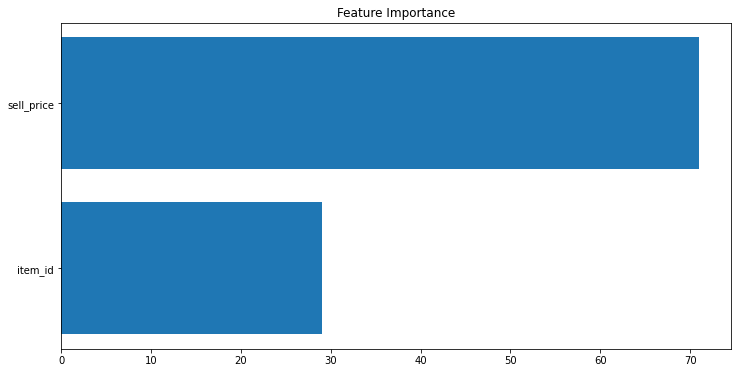

In [10]:
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)

fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')

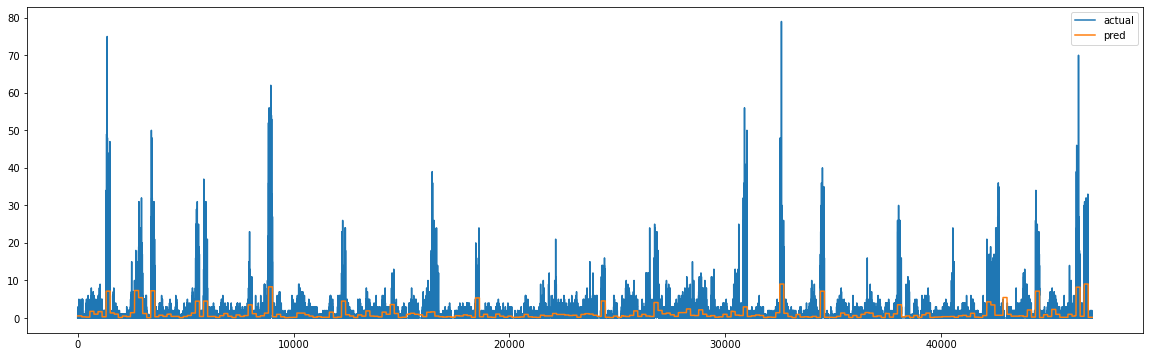

In [11]:
figure(figsize=(20, 6))

y_pred = model.predict(X_test)

plt.plot(y_test.to_numpy(),label='actual')
plt.plot(y_pred,label='pred')

plt.legend()

In [12]:
item_id = 0
X_test = X_test[X_test['item_id']==item_id]
X_test

,item_id,sell_price
857,0,8.26
858,0,8.26
859,0,8.26
860,0,8.26
861,0,8.26
...,...,...
1040,0,8.38
1041,0,8.38
1042,0,8.38
1043,0,8.38


In [13]:
valid = valid[valid['item_id']==item_id]
valid

,item_id,sell_price,units_sold
596,0,8.26,0
597,0,8.26,0
598,0,8.26,1
599,0,8.26,0
600,0,8.26,0
...,...,...,...
852,0,8.26,0
853,0,8.26,0
854,0,8.26,0
855,0,8.26,0


In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred = []

for i in range(0,window):
    
    x = X_test.iloc[[i]]
    
    if i!=0:
        x['daily_rolling_mean_'+str(window)] = ( prev_sales.sum() + np.sum(y_pred) )/window
    
    y = model.predict(x)[0]
    y_pred.append(y)
    
    prev_sales = valid.tail(window-(i+1))['units_sold'].to_numpy()

y_pred

In [ ]:
rows = X_test.shape[0]

for i in range(window,rows):
    x = X_test.iloc[[i]]
    x['daily_rolling_mean_'+str(window)] = np.sum(y_pred[i-window:i])/window
    y = model.predict(x)[0]
    y_pred.append(y)

y_pred

In [ ]:
test = new_df[new_df['date']>='2015-11-17']
a = test[test['item_id']==item_id]
b = a['units_sold']
b

In [ ]:
y_actual = b.to_numpy()
length = len(y_actual)

y_mean = np.mean(y_actual)
y_mean = y_mean * np.ones(length)

y_pred_MSE = round(mean_squared_error(y_actual,y_pred),3)
y_mean_MSE = round(mean_squared_error(y_actual,y_mean),3)

figure(figsize=(20, 6))

plt.title('Units sold of item_id=02 over test period')
plt.xlabel('Test day')
plt.ylabel('Units sold')

plt.plot(y_actual,label='actual')
plt.plot(y_pred,label='pred (MSE='+str(y_pred_MSE)+')')
plt.plot(y_mean,label='mean (MSE='+str(y_mean_MSE)+')')

plt.legend()
plt.show()

In [ ]:
################################################################################################################################

In [ ]:
################################################################################################################################

In [ ]:
################################################################################################################################

In [ ]:
item_id = 1
single_item_df = df2[df2['item_id']==item_id]

single_item_df

In [ ]:
# Plot heatmap

fig, ax = plt.subplots(figsize=(14,14))
sns.heatmap(single_item_df.corr(),annot=True)

In [ ]:
# Slice columns of interest

single_item_df = single_item_df[['date','day','month','units_sold']]

window = 7

single_item_df['daily_rolling_mean_'+str(window)] = single_item_df['units_sold'].rolling(window,closed='left').mean()
single_item_df = single_item_df.where(pd.notnull(single_item_df), 0)

single_item_df

In [ ]:
single_item_df['date'] = single_item_df['date'].astype(str)
single_item_df['near_xmas'] = 0
single_item_df['near_xmas'] = single_item_df['date'].apply( lambda x: 1 if (x>='2011-12-01' and x<='2011-12-26')
                                                           or (x>='2012-12-01' and x<='2012-12-26')
                                                           or (x>='2013-12-01' and x<='2013-12-26')
                                                           or (x>='2014-12-01' and x<='2014-12-26')
                                                           or (x>='2015-12-01' and x<='2015-12-26')
                                                           or (x>='2016-12-01' and x<='2016-12-26')
                                                           else 0 )

single_item_df

In [ ]:
fig, ax = plt.subplots(figsize=(14,14))
sns.heatmap(single_item_df.corr(),annot=True)

In [ ]:
################################################################################################################################

In [ ]:
train = single_item_df[single_item_df['date']<'2015-03-01']
train = train.drop(columns='date')
X_train = train.drop(columns='units_sold')
y_train = train['units_sold']

valid = single_item_df[ (single_item_df['date']>='2015-03-01') & (single_item_df['date']<'2015-11-17') ]
valid = valid.drop(columns='date')
X_valid = valid.drop(columns='units_sold')
y_valid = valid['units_sold']

test = single_item_df[single_item_df['date']>='2015-11-17']
test = test.drop(columns='date')
X_test = test.drop(columns='units_sold')
y_test = test['units_sold']

train.shape[0] / single_item_df.shape[0], valid.shape[0] / single_item_df.shape[0], test.shape[0] / single_item_df.shape[0]

In [ ]:
# Define categorical features

cat_columns = ['day','month','near_xmas']
print("Names of categorical columns : ", cat_columns)

cat_idx = [X_train.columns.get_loc(col) for col in cat_columns]
print("Indices of categorical columns : ",cat_idx)

In [ ]:
# Import the Pool class from catboost and use it for train/test split

from catboost import Pool


train_data = Pool(data=X_train,
                  label=y_train,
                  cat_features=cat_idx
                 )

valid_data = Pool(data=X_valid,
                  label=y_valid,
                  cat_features=cat_idx
                 )

In [ ]:
# Create catboost model and train it

from catboost import CatBoostRegressor
from sklearn.model_selection import GridSearchCV

model = CatBoostRegressor(random_seed=2022,iterations=600,learning_rate=0.075)
model.fit(train_data, eval_set=valid_data)

# parameters = {'depth' : [6,8,10],
#               'learning_rate' : [0.01, 0.05, 0.1],
#               'iterations'    : [30, 50, 100]
#               }

# grid = GridSearchCV(estimator=model, param_grid = parameters, cv = 2, n_jobs=-1)
# grid.fit(X_train, y_train)
# grid.best_params_

In [ ]:
################################################################################################################################

In [ ]:
y_pred = []

for i in range(0,window):
    
    x = X_test.iloc[[i]]
    
    if i!=0:
        x['daily_rolling_mean_'+str(window)] = ( prev_sales.sum() + np.sum(y_pred) )/window
    
    y = model.predict(x)[0]
    y_pred.append(y)
    
    prev_sales = valid.tail(window-(i+1))['units_sold'].to_numpy()

y_pred

In [ ]:
rows = X_test.shape[0]

for i in range(window,rows):
    x = X_test.iloc[[i]]
    x['daily_rolling_mean_'+str(window)] = np.sum(y_pred[i-window:i])/window
    y = model.predict(x)[0]
    y_pred.append(y)

y_pred

In [ ]:
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)

fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')

In [ ]:
################################################################################################################################

In [ ]:
# y_pred = model.predict(X_test)

y_actual = y_test.to_numpy()
length = len(y_actual)

y_mean = np.mean(y_actual)
y_mean = y_mean * np.ones(length)

y_pred_MSE = round(mean_squared_error(y_actual,y_pred),3)
y_mean_MSE = round(mean_squared_error(y_actual,y_mean),3)

figure(figsize=(20, 6))

plt.title('Units sold of item_id=002 over test period')
plt.xlabel('Test day')
plt.ylabel('Units sold')

plt.plot(y_actual,label='actual')
plt.plot(y_pred,label='pred (MSE='+str(y_pred_MSE)+')')
plt.plot(y_mean,label='mean (MSE='+str(y_mean_MSE)+')')

plt.legend()
plt.show()

In [ ]:
################################################################################################################################

In [ ]:
item_id = 'HOBBIES_1_002'
df4 = df3[df['item_id']==item_id]

df5 = df4[['date','units_sold']]
df5 = df5.set_index('date')

df5

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomp_viz = seasonal_decompose(df5)
fig = decomp_viz.plot()
fig.set_size_inches((18, 9))
# Tight layout to realign things
fig.tight_layout()
plt.show()

In [ ]:
################################################################################################################################